# Machine Learning - Decision Tree - Malignant or Benign?

<center><img src="../images/generated/Gemini_Generated_Image_8fu90a8fu90a8fu9.jpeg" width="400"></center>
</br>
</br>
In this activity we will explore a medical diagnosis dataset and apply a classification model.

## Import Libraries

As usual, we will import a bunch of libraries to get started.

note - we will be importing additional libraries later on in the activity.

In [1]:
## Begin Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
## End Imports

## Load Dataset

The dataset for this activity is the Scikit-learn breast cancer dataset.

The goal is to predict if a breast tumor is malignant (cancerous) or benign (non-cancerous) based on features extracted from a digitized image of a fine needle aspirate (FNA) of a breast mass.

(_AI Generated Summary Begins Here_)
Data Set Summary:

* __Number of Samples:__ 569 tumor samples.

* __Features:__ 30 numerical features that describe the characteristics of the cell nuclei in each image. Examples include the mean radius, texture, perimeter, and area.

* __Target:__ The target variable is the diagnosis, with two possible classes:

* __`0`:__ Malignant (212 samples)

* __`1`:__ Benign (357 samples)

(_AI Generated Summary Ends Here - Credit Gemini_)

__Loading the Dataset:__
* `load_breast_cancer()` returns a dictionary containing the data we will use
* `data` - an array of feature values
* `target` - an array of target values where `0` is `malignant` and `1` is `benign`
* `feature_names` - column names
* `target_names` - an array of the target names

We will load the individual the following items into a DataFrame for inspection:

* data
* feature_names

In [2]:
# Load Data
breast_cancer = load_breast_cancer()
data = breast_cancer["data"]
columns = breast_cancer["feature_names"]
target = breast_cancer["target"]
target_columns = breast_cancer["target_names"]

# Load Data Into DataFrame
X = pd.DataFrame(
    data=data, 
    columns=columns
)

y = pd.Series(data=target)

## Getting Familiar With the Data

In [3]:
# View X's Info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
# Preview X's Rows
X.sample(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.026470,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.1292,0.20740,0.179100,0.10700,0.3110,0.07592
385,14.60,23.29,93.97,664.7,0.08682,0.06636,0.083900,0.052710,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.1312,0.15810,0.267500,0.13590,0.2477,0.06836
252,19.73,19.82,130.70,1206.0,0.10620,0.18490,0.241700,0.097400,0.1733,0.06697,...,25.28,25.59,159.80,1933.0,0.1710,0.59550,0.848900,0.25070,0.2749,0.12970
418,12.70,12.17,80.88,495.0,0.08785,0.05794,0.023600,0.024020,0.1583,0.06275,...,13.65,16.92,88.12,566.9,0.1314,0.16070,0.093850,0.08224,0.2775,0.09464
482,13.47,14.06,87.32,546.3,0.10710,0.11550,0.057860,0.052660,0.1779,0.06639,...,14.83,18.32,94.94,660.2,0.1393,0.24990,0.184800,0.13350,0.3227,0.09326
88,12.36,21.80,79.78,466.1,0.08772,0.09445,0.060150,0.037450,0.1930,0.06404,...,13.83,30.50,91.46,574.7,0.1304,0.24630,0.243400,0.12050,0.2972,0.09261
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.1411,0.35420,0.277900,0.13830,0.2589,0.10300
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.027380,0.1593,0.06127,...,10.84,34.91,69.57,357.6,0.1384,0.17100,0.200000,0.09127,0.2226,0.08283
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.013350,0.02022,0.3292,0.06522
58,13.05,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289


In [5]:
# View Target Info
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: None
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [6]:
# View Target Value Counts
y.value_counts()

1    357
0    212
Name: count, dtype: int64

## Inspecting the Shape of the Features and Target

In [7]:
# Inspect Feature (X) Shape
X.shape

(569, 30)

In [8]:
# Inspect Target (y) Shape
y.shape

(569,)

## Visualizing the Distribution of Data

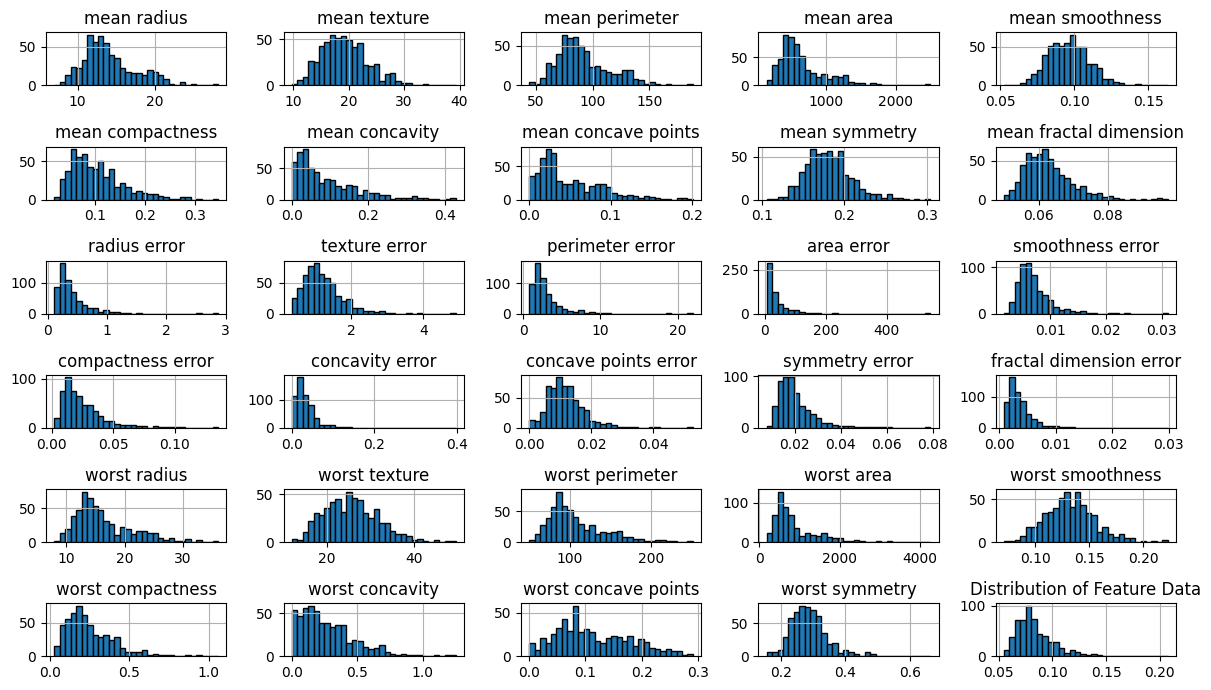

In [9]:
## Visualize Distribution of Feature Data
X.hist(
    figsize=(12,7),
    bins=30,
    edgecolor="black"
)

plt.subplots_adjust(
    hspace=0.7,
    wspace=0.4
)

plt.title("Distribution of Feature Data")

plt.tight_layout()

## Visualizing Target Data

Text(0.5, 1.0, 'Tumor Classification Counts')

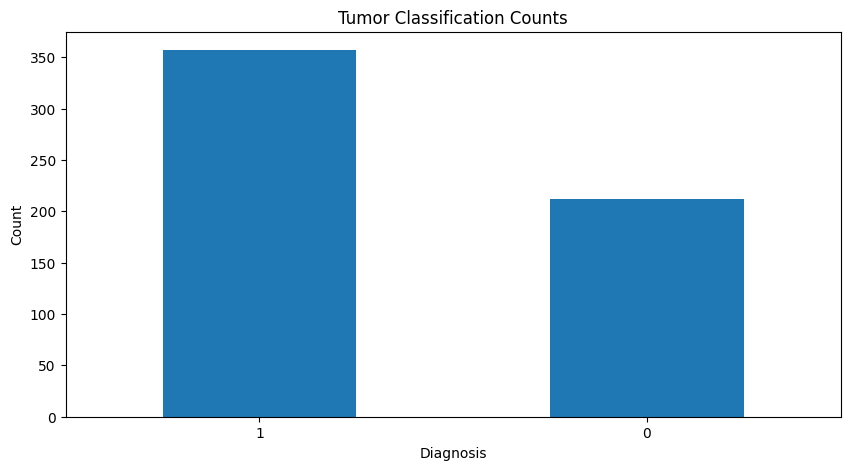

In [10]:
# Bar Chart of Total Counts of Malignant and Benign
y.value_counts().plot(kind="bar",
            figsize=(10,5))

plt.ylabel("Count")
plt.xlabel("Diagnosis")
plt.xticks(rotation=0)
plt.title("Tumor Classification Counts")

## Splitting up the Data for Training

In [11]:
# Split Up Data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=42,
    test_size=0.2
)

print("Split Complete")

Split Complete


## Inspecting the Shape and Features of the Training and Test Data

In [12]:
# X Train Shape
X_train.shape

(455, 30)

In [13]:
# y Train Shape
y_train.shape

(455,)

In [14]:
# X Test Shape
X_test.shape

(114, 30)

In [15]:
# Y Test Shape
y_test.shape

(114,)

## Build Model - Decision Tree

Importing Decision Tree Classifier

```python
from sklearn.tree import DecisionTreeClassifier
```

In [16]:
## Import and Build Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    random_state=42
)

print("Tree Imported")

Tree Imported


## Train Model
Training the model

```python
model.fit(X_training_data, y_training_data)
```

In [17]:
## Train Model
clf.fit(X_train, y_train)

print("Training Complete")

Training Complete


## Get Predictions
Getting the model's predictions

```python
model.predict(X_testing_data)
```

In [18]:
## Get Predictions
predictions = clf.predict(X_test)
predictions


array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0])

## Evaluating the Model

Given the nature of the dataset, let's run a few different tests of the model:
* Accuracy Score
* Confusion Matrix
* Precision Score
* Recall Score

### Accuracy Score

Accuracy Score is the ration of correct predictions to the the total number of predictions.

`accuracy_score` takes two arguments:
* actual correct labels
* predicted labels from model

Returns the accuracy as a fraction (float between `0` and `1`)


Gets the ratio of correct predictions to the total number of predictions
Accuracy = Correct Predictions / Total Number of Predictions

__Accuracy Score Pros and Cons__:

* (+) Simple and Easy to use
* (-) Can be misleading with imbalanced datasets where the numbers in one class is significantly higher than in another

__Importing Accuracy Score__:

```python
from sklearn.metrics import accuracy_score
```

In [19]:
### Accuracy Score Results
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)



0.9473684210526315

### Confusion Matrix

Best used for binary classification (think spam not spam or in this case malignant or benign)

`confusion_matrix()` takes in `y_test` data, model `predictions`, and labels and returns a 2 by 2 tables with 4 key components:

* `True Positive` - Model correctly predicted positive
* `True Negative` - Model correction predicted negative
* `False Positive` - Model incorrectly predicted positive 
* `False Negative` - Model incorrectly predicted negative

__Importing Confusion Matrix__:

```python
from sklearn.metrics import confusion_matrix
```

In [20]:
### Confusion Matrix Results
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    y_test, 
    predictions,
    labels=clf.classes_
)

cm

array([[40,  3],
       [ 3, 68]])

#### Confusion Matrix - Making Sense of It

Here is a break down of the Confusion Matrix as a table.

| |Predicted Negative |Predicted Positive|
|:---|:---|:---|
|Actual Negative| True Negatives |   False Positives|
|Actual Positive |False Negatives  |True Positives

Text(0.5, 1.0, 'Breast Cancer Prediction Confusion Matrix')

<Figure size 600x600 with 0 Axes>

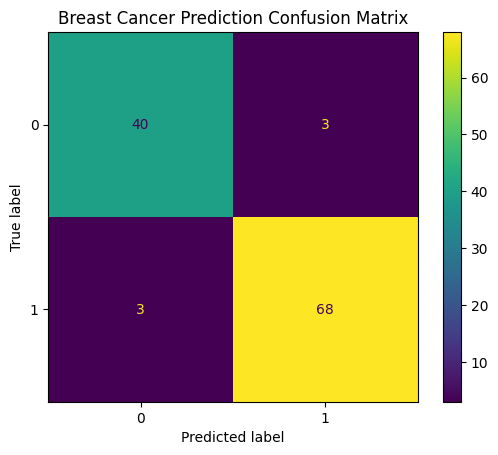

In [21]:
from sklearn import metrics

matrix_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels=clf.classes_
)

plt.figure(figsize=(6,6))

matrix_display.plot()

plt.title("Breast Cancer Prediction Confusion Matrix")

### Precision Score
Precision measures the accuracy of positive predictions made by a model: "Of all the instances the model predicted as positive, how many where actually positive?"

* `precision_score` takes in the `y_test` and `predictions` results and returns a float from 0-1.
* A higher score indicates higher precision

__Formula__:

Precision = True Positives / (True Positives + False Positives)


__Uses__:

Precision is important when the cost of a false positive is high.

* Spam Detections
* Medical Diagnosis
* E-commerce Recommendations

__Importing Precision Score__:

```python
from sklearn.metrics import precision_score
```

In [22]:
### Precision Score Results
from sklearn.metrics import precision_score

precision_score(y_test, predictions)

0.9577464788732394

### Recall Score

Recall Score asks the question: "of all the instances that were actually positive, how many did the model correctly identify?"

Focusing on the model's ability to find all the positive cases

__Formula:__

Recall = True Positive / (True Positive + False Negative)

__Uses:__

* Recall is important when the the cost of a false negative is high.
* For example, medical diagnosis a false negative could have life-threatning consequences.

__Importing Recall Score:__

```python
from sklearn.metrics import recall_score
```

In [23]:
### Recall Score Results
from sklearn.metrics import recall_score

recall_score(y_test, predictions)

0.9577464788732394

### Classification Report

Alternatively, can can run `classification_report` to evaluate the model's performance.

`classification_report` takes in the `y_test`, `predictions`, and `target_names` and returns:
* __Precision Score__ - positive predictions that where correct
* __Recall Score__ - how many positive cases the model correctly identified
* __F1-Score__ - harmonic mean of precision and recall - ranging from 0-1, 1 is best possible score
* __Support__ - number of actual occurences of each class

__note:__ a high F1 for a class with low support may not be as meangingful as a slightly lower F1 for a class with high support

__Importing Classification Report:__

```python
from sklearn.metrics import classification_report
```

In [24]:
### Classification Report Results
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=["malignant", "benign"])) 

              precision    recall  f1-score   support

   malignant       0.93      0.93      0.93        43
      benign       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Visualizing the Decision Tree

Text(0.5, 1.0, 'Decision Tree')

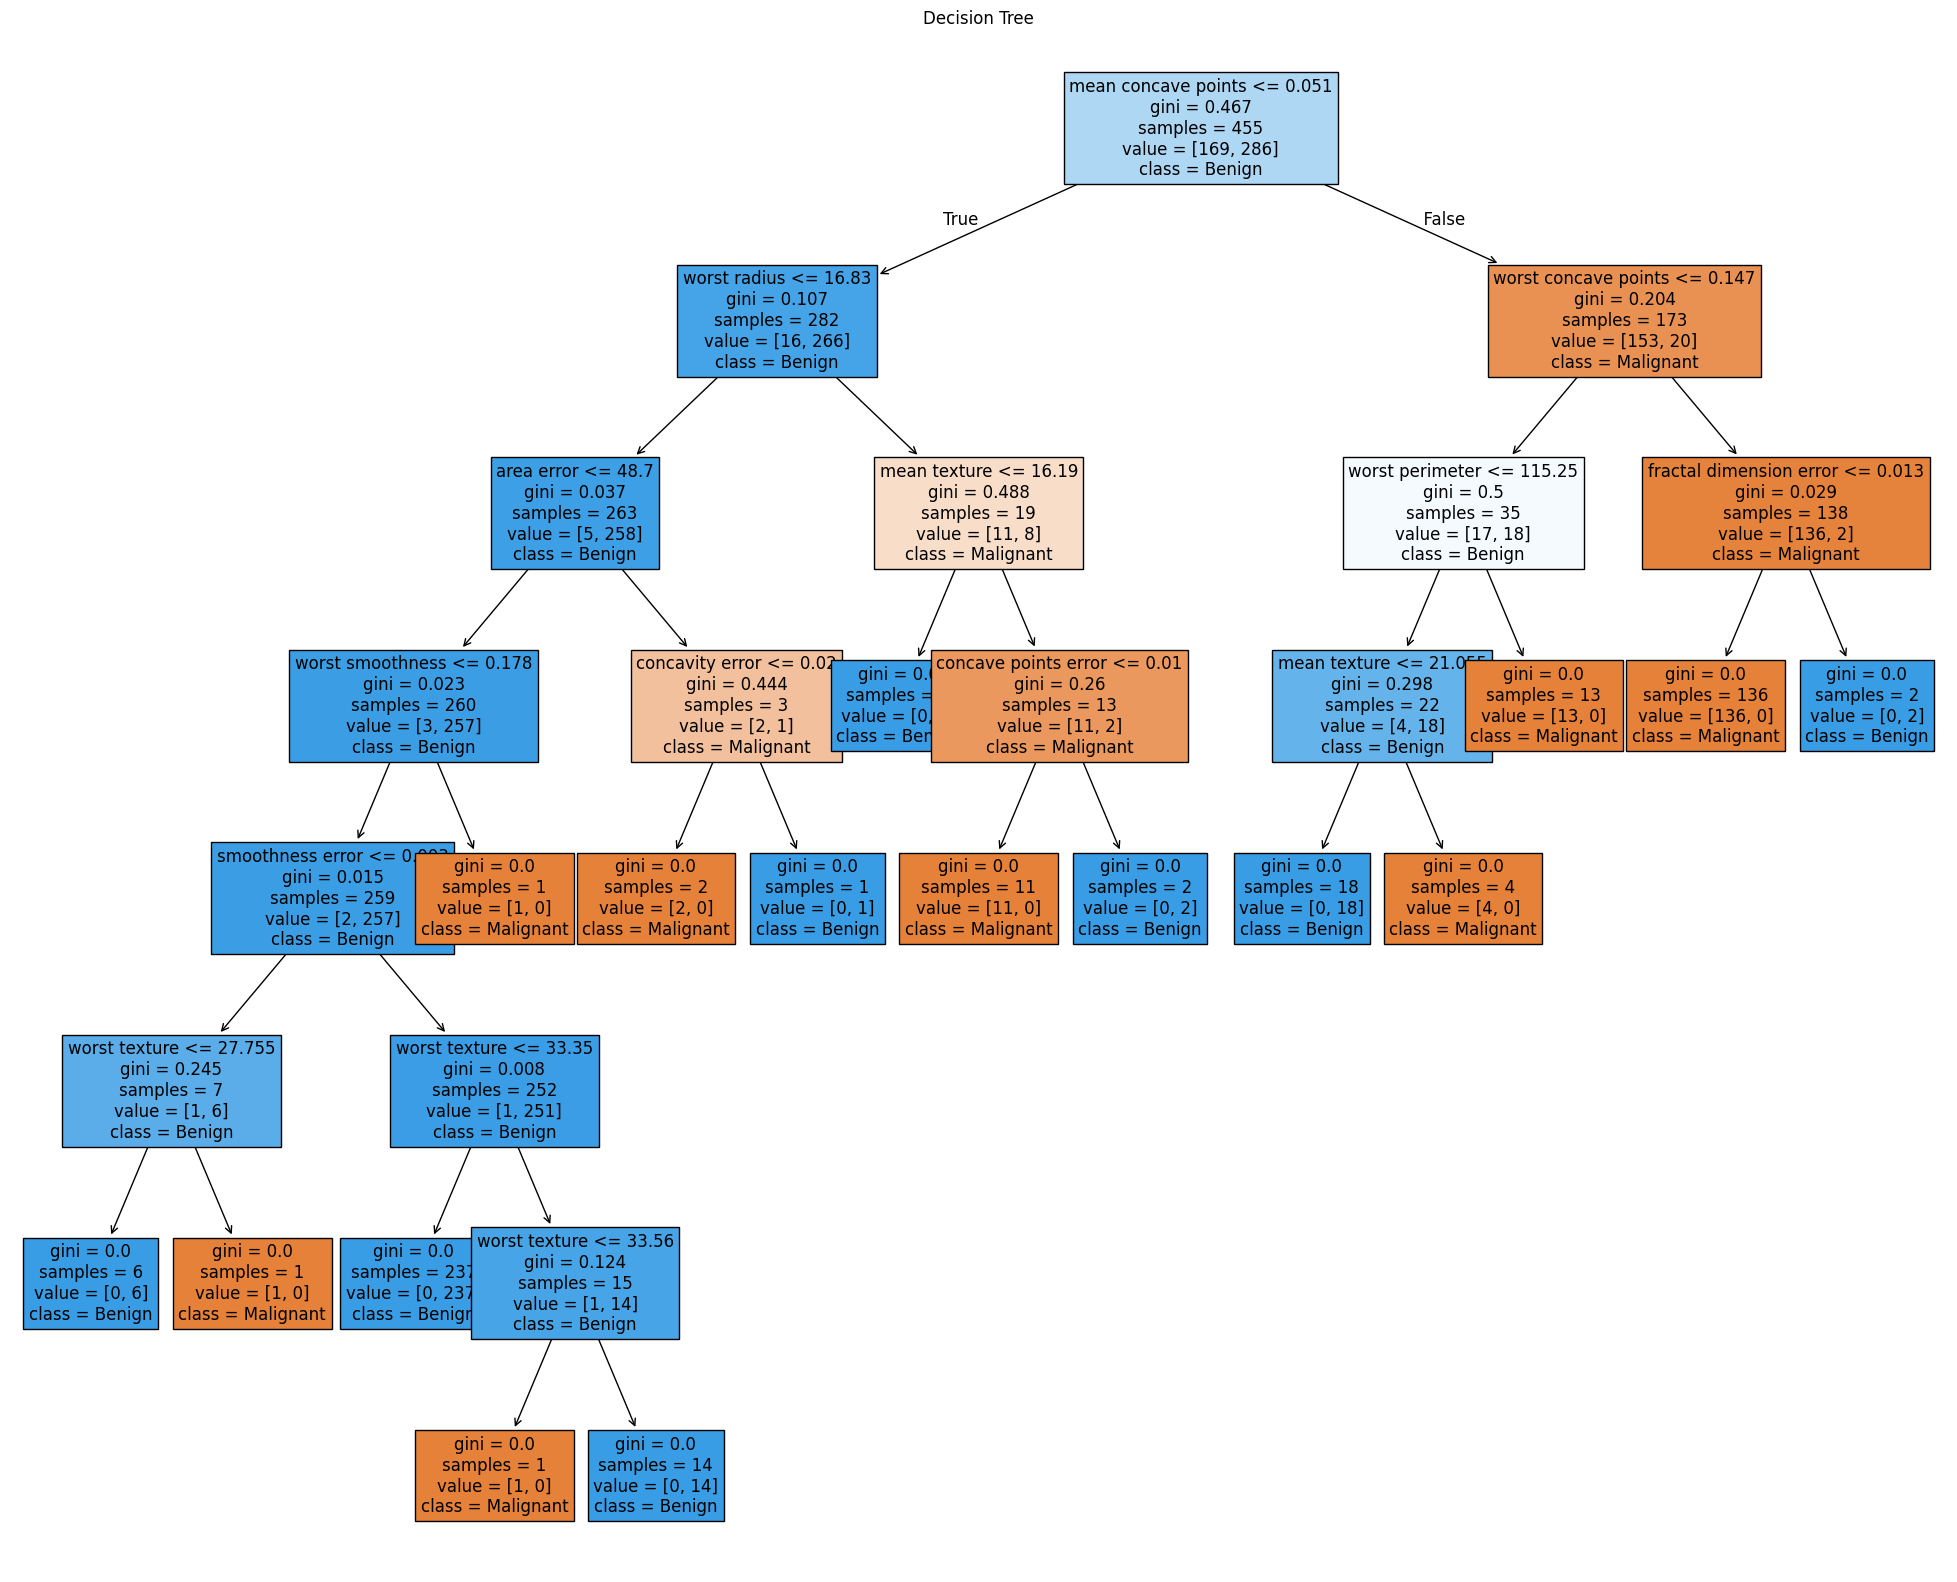

In [25]:
from sklearn import tree

plt.figure(figsize=(25,20))
tree.plot_tree(
    clf,
    feature_names=X.columns,
    class_names={0: "Malignant", 1: "Benign"},
    filled=True,
    fontsize=12)

plt.title("Decision Tree")

# Improving the Model

Next up, you will improve the model.

We'll take a look at Feature Importances, prune features that aren't pulliing their weights, rebuild the model, and evaluate the results.

### Feature Importances

Feature Importances is a technique that measures how much each feature in the dataset contributes to a model's predictions.

* Each input variable is given a score that indicates its relative infuence on the model's output.
* A higher score means a feature has a larger impact on the model's ability to make accurate predictions.

__Access Feature Importance:__

```python
clf.feature_importances_
```

In the cell below, let's create a new DataFrame from the `feature_importances` attribute where the index is the columns from the original DataFrame and the column is called `importance`.

We will then display the first 10 rows of data in descending order.

In [26]:
## Implement Feature Importance

# Extract Importances
importances = clf.feature_importances_
feature_names = X.columns

# Create Dictionary
feature_dictionary = {"feature": feature_names, "importance": importances}

# Create Data Frame
feature_data_df = pd.DataFrame(feature_dictionary)

# Sort Data Frame
feature_data_df = feature_data_df.sort_values(
    by="importance",
    ascending=False
)

feature_data_df.head(10)

,feature,importance
7,mean concave points,0.691420
27,worst concave points,0.065651
1,mean texture,0.058478
20,worst radius,0.052299
22,worst perimeter,0.051494
19,fractal dimension error,0.018554
21,worst texture,0.017445
17,concave points error,0.015931
13,area error,0.011983
24,worst smoothness,0.009233


## Visual Feature Importance

In the cell below, create a bar graph, visualizing Feature Importances.

Text(0.5, 1.0, 'Breast Cancer Classification Model Feature Importances (Top 10)')

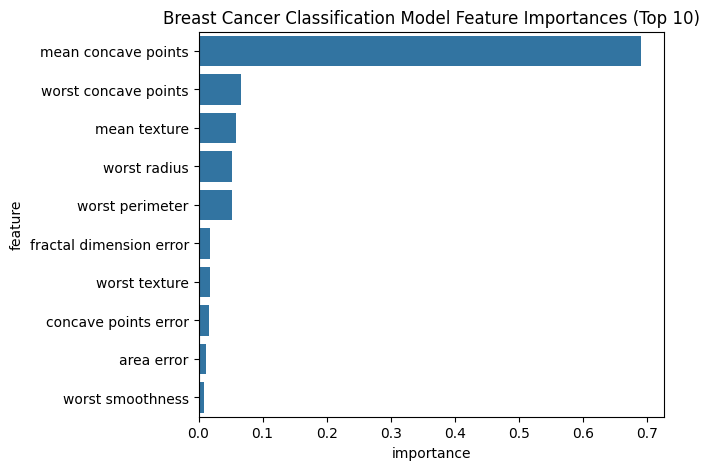

In [27]:
## Visualize Feature Importance
plt.figure(figsize=(6,5))

sns.barplot(
    data=feature_data_df.head(10),
    x="importance",
    y="feature",
)

plt.title("Breast Cancer Classification Model Feature Importances (Top 10)")

## Preserve the top 10 features

In the cell below, create a new feature DataFrame to be used for training/testing called `X_pruned` that keeps only the top 10 features and view it's information.

In [28]:
# Preserve the top 10 features
top_10_features = feature_data_df.head(10)['feature'].values

X_pruned = X[top_10_features]

X_pruned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean concave points      569 non-null    float64
 1   worst concave points     569 non-null    float64
 2   mean texture             569 non-null    float64
 3   worst radius             569 non-null    float64
 4   worst perimeter          569 non-null    float64
 5   fractal dimension error  569 non-null    float64
 6   worst texture            569 non-null    float64
 7   concave points error     569 non-null    float64
 8   area error               569 non-null    float64
 9   worst smoothness         569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


## Split the New Training Data

Now let's split the Data for testing using the `X_pruned` and `y` datasets.

In [29]:
# Create and Split the New Test Data
X_pruned_train, X_pruned_test, y_train, y_test = train_test_split(
    X_pruned,
    y,
    test_size=0.2,
    random_state=42
)


## Build A New Classifier

Create a New Classifier Model

In [30]:
# Build the New Model
tree_pruned = DecisionTreeClassifier(
    random_state=42,
)


## Train the New Model

Using `X_pruned_train` and `y_train`, train the new model.

In [31]:
# Train the New Model
tree_pruned.fit(X_pruned_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Run Predictions

Using `X_pruned_test`, store the model's predictions results.

In [32]:
# Predict
predictions_pruned = tree_pruned.predict(X_pruned_test)


## Classification Report

Run the classification report on the model's predictions.

Was there an improvement?

In [33]:
# Get Classification Report
print(classification_report(y_test, predictions_pruned, target_names=["malignant", "benign"]))


              precision    recall  f1-score   support

   malignant       0.93      0.91      0.92        43
      benign       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

